# Data Analysis for APPL Data
## Introduction

This notebook focuses on analyzing historical market data for the stock APPL. We will clean, explore, and engineer features from the data collected from Yahoo Finance. The goal is to prepare the dataset for visualization and further analysis, including potential predictive modeling.

### 1. Loading Data

We begin by loading the raw stock data from the "data/raw/market data/" directory. The data includes historical prices and volumes for selected stocks.

In [2]:
import pandas as pd
import os

data_dir = '../data/raw/market data/'
files = os.listdir(data_dir)
print(files)


['AAPL.csv', 'ABG.JO.csv', 'META.csv', 'MSFT.csv']


In [3]:
data = pd.read_csv(f'{data_dir}AAPL.csv')
print(data.head())

# data.set_index('Date', inplace=True)

# print(data.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  2000-01-03  0.936384  1.004464  0.907924  0.999442   0.844981  535796800
1  2000-01-04  0.966518  0.987723  0.903460  0.915179   0.773741  512377600
2  2000-01-05  0.926339  0.987165  0.919643  0.928571   0.785063  778321600
3  2000-01-06  0.947545  0.955357  0.848214  0.848214   0.717125  767972800
4  2000-01-07  0.861607  0.901786  0.852679  0.888393   0.751094  460734400


### 2. Exploratory Data Analysis (EDA)
#### 2.1 Descriptive Statistics

We start our analysis by exploring the basic statistics of the dataset, such as mean, median, standard deviation, and other relevant metrics. This helps us understand the distribution and characteristics of the data.

In [4]:
print(data.describe())

              Open         High          Low        Close    Adj Close  \
count  6186.000000  6186.000000  6186.000000  6186.000000  6186.000000   
mean     39.567958    39.994275    39.159614    39.593067    38.224071   
std      55.779585    56.383864    55.218721    55.824286    55.607163   
min       0.231964     0.235536     0.227143     0.234286     0.198078   
25%       2.318036     2.345893     2.279464     2.306607     1.950127   
50%      15.548214    15.698215    15.371607    15.516250    13.356434   
75%      43.711874    43.909999    43.411251    43.741876    41.556162   
max     236.479996   237.229996   233.089996   234.820007   234.820007   

             Volume  
count  6.186000e+03  
mean   3.915594e+08  
std    3.843785e+08  
min    2.404830e+07  
25%    1.214534e+08  
50%    2.735404e+08  
75%    5.253598e+08  
max    7.421641e+09  


### 2.3 Time Series Analysis

Analyze the time series components such as trends and seasonality. This includes visualizing the closing prices over time and identifying patterns.

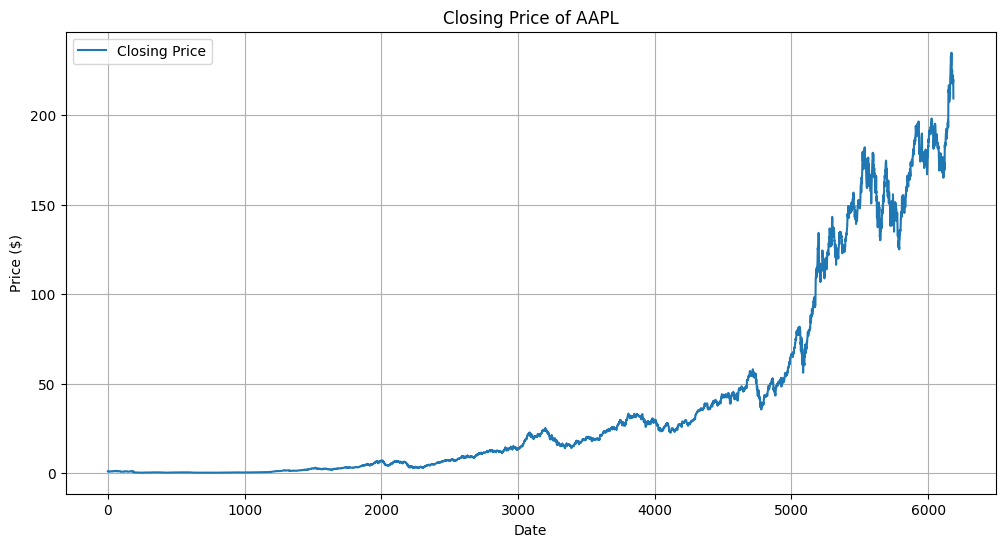

In [5]:
import matplotlib.pyplot as plt

# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price')
plt.title('Closing Price of AAPL')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


## 3. Feature Engineering

Since the data from yfinance is already clean, we focus on creating new features that can provide additional insights or be used in predictive modeling.
### 3.1 Technical Indicators

We calculate technical indicators such as moving averages, RSI (Relative Strength Index), and MACD (Moving Average Convergence Divergence).

#### MOVING AVERAGES

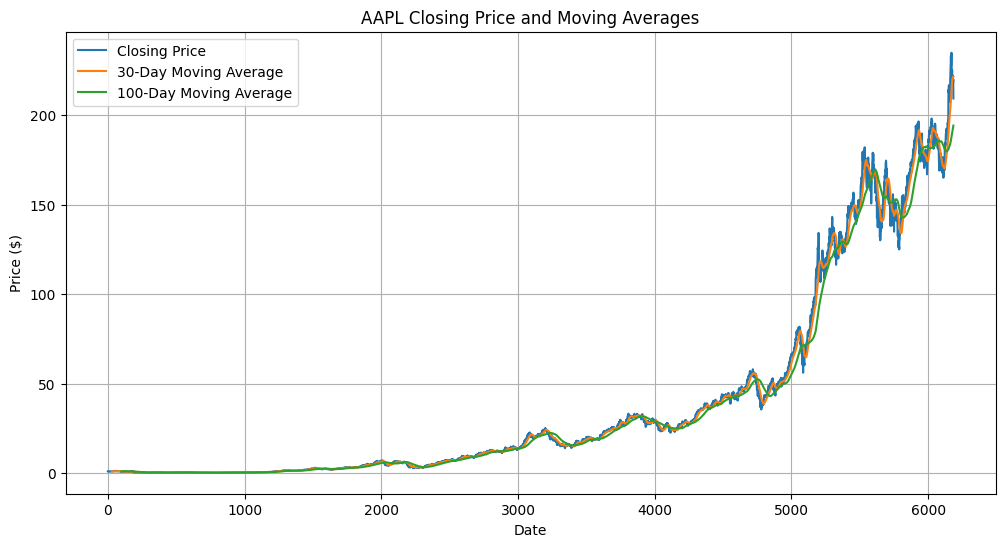

In [6]:

data['MA_30'] = data['Close'].rolling(window=30).mean()
data['MA_100'] = data['Close'].rolling(window=100).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['MA_30'], label='30-Day Moving Average')
plt.plot(data['MA_100'], label='100-Day Moving Average')
plt.title('AAPL Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


#### RETURNS

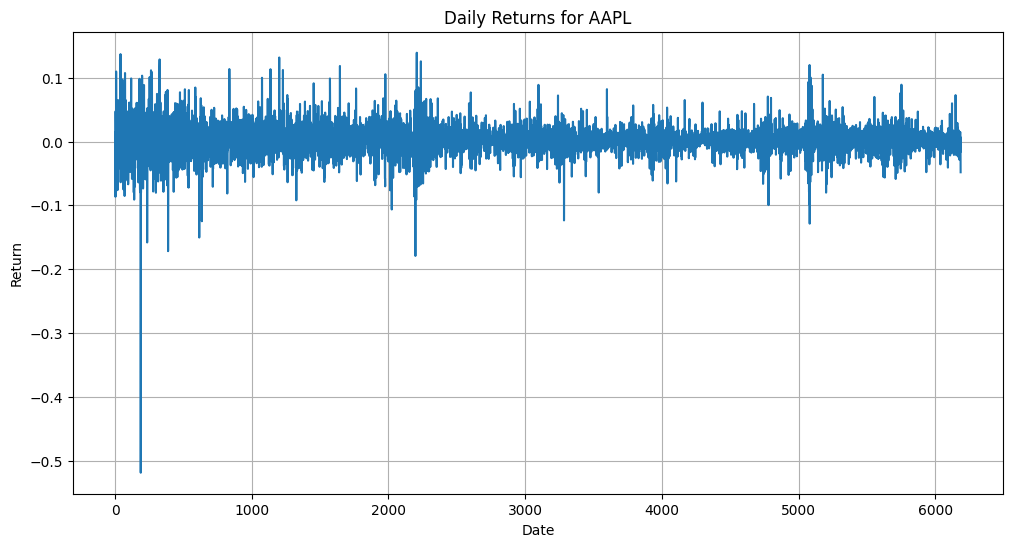

In [7]:
data['Daily Returns'] = data['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(data['Daily Returns'], label='Daily Returns')
plt.title('Daily Returns for AAPL')
plt.xlabel('Date')
plt.ylabel('Return')
plt.grid(True)
plt.show()

This calculates the log returns, which are often used in financial analysis due to their statistical properties. Log returns are useful for modeling and forecasting because they are time additive and can handle compounding more naturally.

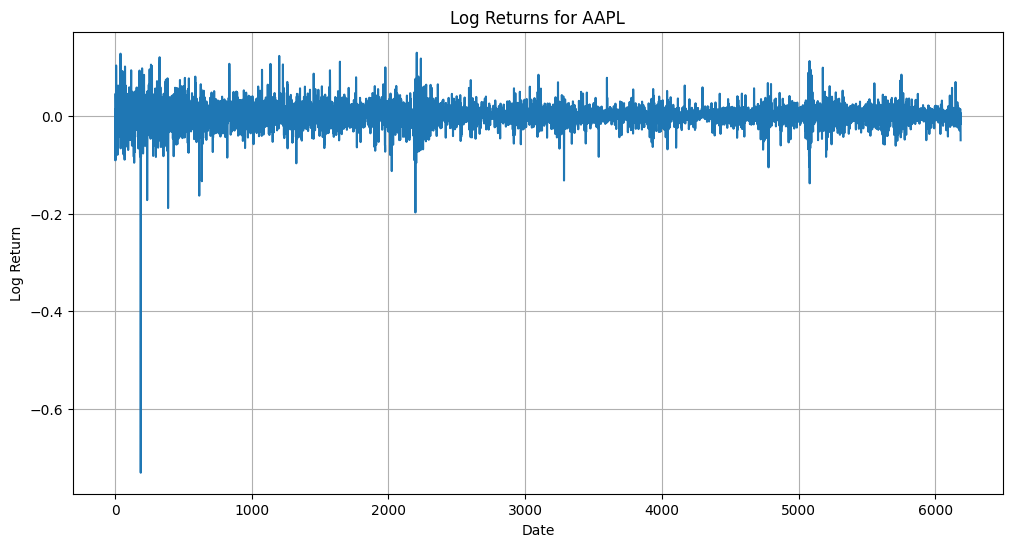

In [8]:
import numpy as np
# Calculate returns and add to DataFrame
data["Log Returns"] = np.log(data["Close"] / data["Close"].shift(1))
# Calculate cumulative log returns
data['Cumulative Log Returns'] = data['Log Returns'].cumsum()

# Calculate cumulative returns from cumulative log returns
data['Cumulative Returns'] = np.exp(data['Cumulative Log Returns']) - 1

# Convert cumulative returns to percentage
data['Cumulative Percentage Return'] = data['Cumulative Returns'] * 100

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(data['Log Returns'], label='Log Returns')
plt.title('Log Returns for AAPL')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.show()


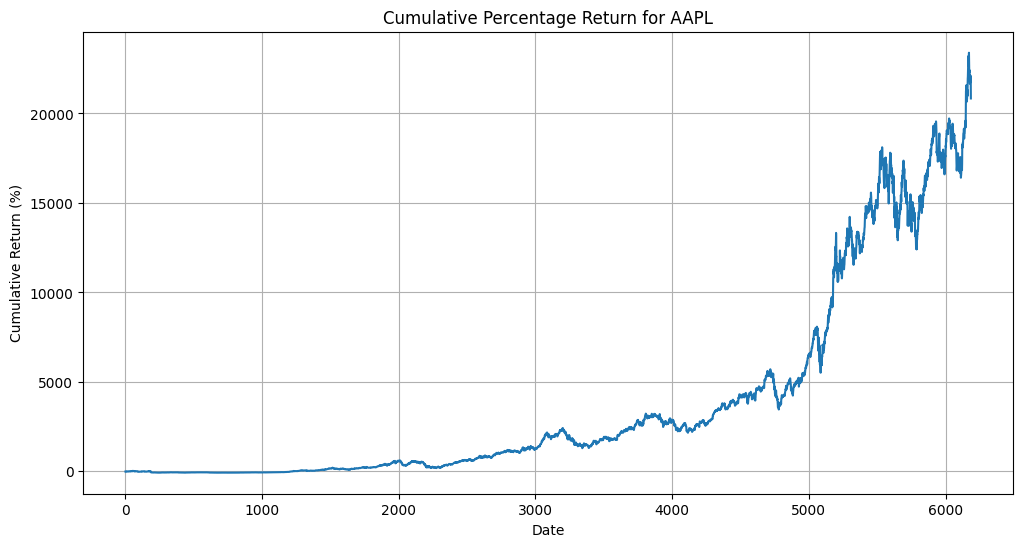

In [9]:
# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative Percentage Return'], label='Cumulative Percentage Return')
plt.title('Cumulative Percentage Return for AAPL')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.grid(True)
plt.show()


### Visualize Rolling Statistics

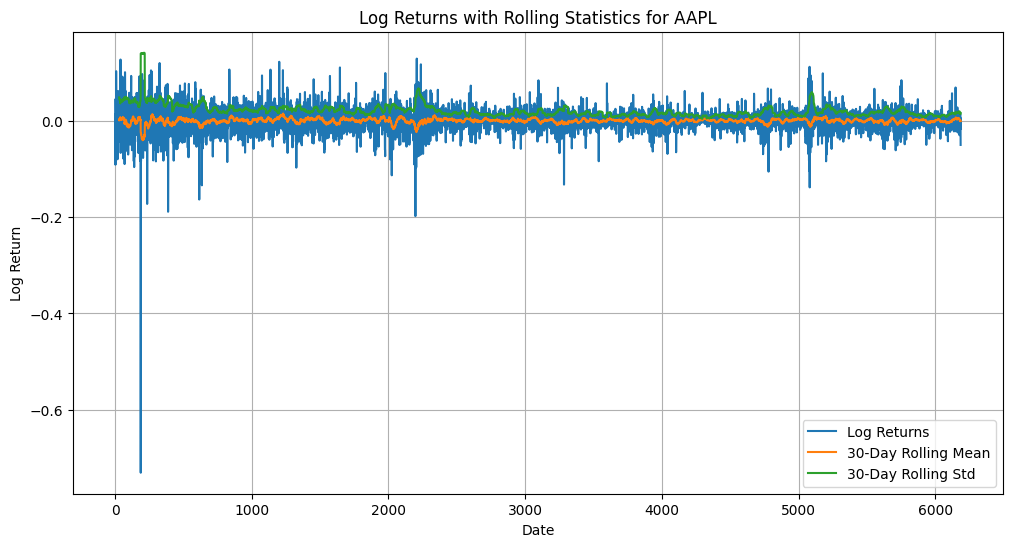

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2000-01-03  0.936384  1.004464  0.907924  0.999442   0.844981  535796800   
1  2000-01-04  0.966518  0.987723  0.903460  0.915179   0.773741  512377600   
2  2000-01-05  0.926339  0.987165  0.919643  0.928571   0.785063  778321600   
3  2000-01-06  0.947545  0.955357  0.848214  0.848214   0.717125  767972800   
4  2000-01-07  0.861607  0.901786  0.852679  0.888393   0.751094  460734400   

   MA_30  MA_100  Daily Returns  Log Returns  Cumulative Log Returns  \
0    NaN     NaN            NaN          NaN                     NaN   
1    NaN     NaN      -0.084310    -0.088077               -0.088077   
2    NaN     NaN       0.014633     0.014527               -0.073550   
3    NaN     NaN      -0.086538    -0.090514               -0.164064   
4    NaN     NaN       0.047369     0.046281               -0.117783   

   Cumulative Returns  Cumulative Percentage Return  Rolling Mean  Rolling Std  
0          

In [10]:
# Calculate rolling statistics
data['Rolling Mean'] = data['Log Returns'].rolling(window=30).mean()
data['Rolling Std'] = data['Log Returns'].rolling(window=30).std()

# Plot rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(data['Log Returns'], label='Log Returns')
plt.plot(data['Rolling Mean'], label='30-Day Rolling Mean')
plt.plot(data['Rolling Std'], label='30-Day Rolling Std')
plt.title('Log Returns with Rolling Statistics for AAPL')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.grid(True)
plt.show()
print(data.head())

### VOLATILITY

In [11]:
data['Volatility 30'] = data['Log Returns'].rolling(window=30).std()
data['Volatility 100'] = data['Log Returns'].rolling(window=100).std()

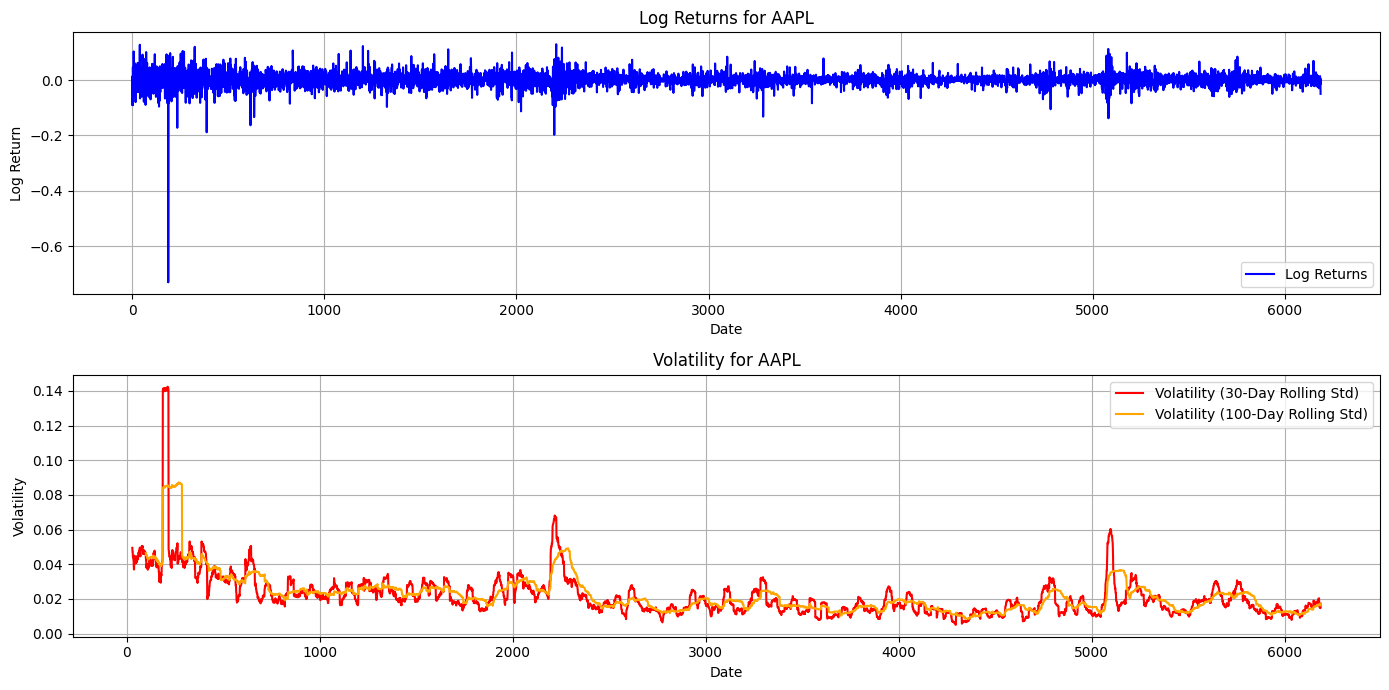

In [12]:
import matplotlib.pyplot as plt

# Plot log returns and volatility
plt.figure(figsize=(14, 7))

# Plot log returns
plt.subplot(2, 1, 1)
plt.plot(data['Log Returns'], label='Log Returns', color='blue')
plt.title('Log Returns for AAPL')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.legend()

# Plot volatility
plt.subplot(2, 1, 2)
plt.plot(data['Volatility 30'], label='Volatility (30-Day Rolling Std)', color='red')
plt.plot(data['Volatility 100'], label='Volatility (100-Day Rolling Std)', color='orange')
plt.title('Volatility for AAPL')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### Conclusion

In this analysis, we have calculated and visualized log returns and volatility for APPL. Log returns provided insights into daily price changes, while volatility highlighted periods of high and low risk. These metrics are crucial for understanding the stock's performance and risk profile, aiding in informed investment decision

### Notes

Log Returns: Useful for understanding daily price changes and can be time additive.
Cumulative Returns: Adjusted for compounding, useful for long-term performance analysis.
Volatility: Indicates the degree of variability in returns, helping assess risk.

In [16]:
data.to_csv('../data/processed/market data/processed_AAPL_data.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_30,MA_100,Daily Returns,Log Returns,Cumulative Log Returns,Cumulative Returns,Cumulative Percentage Return,Rolling Mean,Rolling Std,Volatility 30,Volatility 100
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.844981,535796800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.773741,512377600,NaN,NaN,-0.084310,-0.088077,-0.088077,-0.084310,-8.431001,NaN,NaN,NaN,NaN
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.785063,778321600,NaN,NaN,0.014633,0.014527,-0.073550,-0.070911,-7.091056,NaN,NaN,NaN,NaN
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.717125,767972800,NaN,NaN,-0.086538,-0.090514,-0.164064,-0.151312,-15.131245,NaN,NaN,NaN,NaN
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.751094,460734400,NaN,NaN,0.047369,0.046281,-0.117783,-0.111111,-11.111100,NaN,NaN,NaN,NaN
